In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

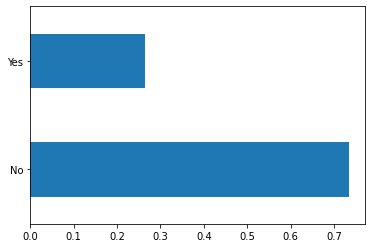

In [6]:
df_churn['Churn'].value_counts(normalize=True).plot(kind='barh')

In [7]:
from sklearn.model_selection import train_test_split

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

In [8]:
df_churn_train = pd.concat([X_train, y_train], axis=1)
df_churn_test = pd.concat([X_test, y_test], axis=1)

In [9]:
y_train.value_counts(normalize=True)

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

No     0.734564
Yes    0.265436
Name: Churn, dtype: float64

In [11]:
!pip install imblearn

- train test split
- preparation / feature engineering
- resampling
- train model

In [12]:
df_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4242 to 5792
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

In [13]:
df_churn_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4242,6124-ACRHJ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,19.75,No
4820,5641-DMBFJ,Female,0,Yes,No,58,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.30,4916.4,No
6587,7426-GSWPO,Male,1,No,No,64,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.50,6548.65,No
1733,1015-OWJKI,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,19.05,No
2221,8619-IJNDK,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),64.05,4492.9,No


<ipython-input-14-b943cf1a1a5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TotalCharges'] = X_train['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0)


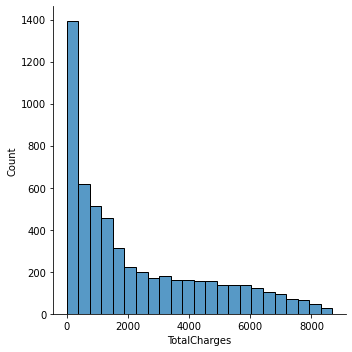

In [14]:
# handle missing value in TotalCharge
X_train['TotalCharges'] = X_train['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0)
sns.displot(X_train['TotalCharges'])

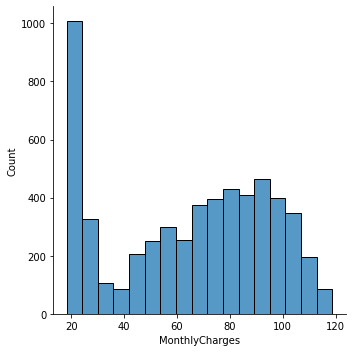

In [15]:
sns.displot(X_train['MonthlyCharges'])

In [16]:
X_train['gender'].value_counts()

Male      2839
Female    2795
Name: gender, dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# scaling
scaled_cols = ['MonthlyCharges', 'TotalCharges']
encoded_col = 'gender'

scaler = MinMaxScaler()
encoder = OneHotEncoder()

# pipeline
col_transformer = ColumnTransformer([
    ('num_prep', scaler, scaled_cols),
    ('ctg_prep', encoder, [encoded_col])
])

X_train_transformed = col_transformer.fit_transform(X_train[['MonthlyCharges', 'TotalCharges', 'gender']])
X_train_prep = np.concatenate([X_train_transformed, np.array(X_train['SeniorCitizen']).reshape(-1,1)], axis=1)
X_train_prep

array([[0.01492537, 0.00227409, 1.        , 0.        , 0.        ],
       [0.65721393, 0.56609248, 1.        , 0.        , 0.        ],
       [0.84825871, 0.75403579, 0.        , 1.        , 1.        ],
       ...,
       [0.94626866, 0.83165415, 1.        , 0.        , 0.        ],
       [0.01791045, 0.04474484, 0.        , 1.        , 0.        ],
       [0.77661692, 0.16428127, 1.        , 0.        , 1.        ]])

In [29]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

used_cols = ['gender', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
# 
# random undersampling
# undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()
# smote_over = SMOTE(random_state=22)
# smotenc_over = SMOTENC(categorical_features=[0])

# X_train_under, y_train_under = undersampler.fit_resample(X_train[used_cols], y_train)
X_train_over, y_train_over = oversampler.fit_resample(X_train[used_cols], y_train)
# X_train_smote, y_train_smote = smote_over.fit_resample(X_train[used_cols], y_train)
# X_train_smotenc, y_train_smotenc = smotenc_over.fit_resample(X_train[used_cols], y_train)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

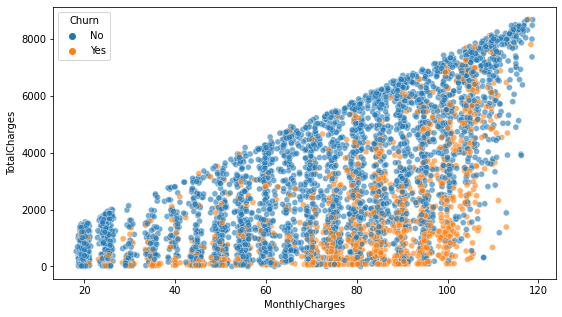

In [19]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=X_train, hue=y_train, alpha=0.6)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

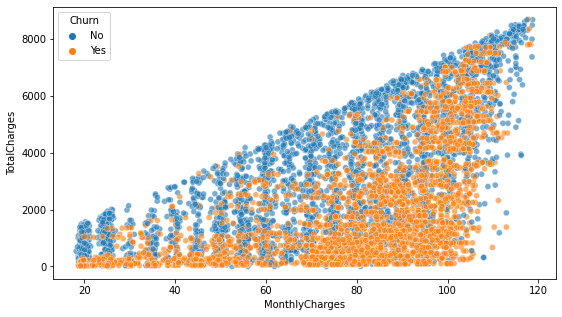

In [26]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=X_train_smote, hue=y_train_smote, alpha=0.6)

In [30]:
# preprocess oversampled dataset
X_train_over_transformed = col_transformer.fit_transform(X_train_over)
X_train_over_prep = np.concatenate([X_train_over_transformed, np.array(X_train_over['SeniorCitizen']).reshape(-1,1)], axis=1)

In [31]:
X_train_over_prep

array([[0.01492537, 0.00227409, 1.        , 0.        , 0.        ],
       [0.65721393, 0.56609248, 1.        , 0.        , 0.        ],
       [0.84825871, 0.75403579, 0.        , 1.        , 1.        ],
       ...,
       [0.82686567, 0.14030835, 0.        , 1.        , 1.        ],
       [0.75621891, 0.22726488, 1.        , 0.        , 1.        ],
       [0.6159204 , 0.04433032, 0.        , 1.        , 0.        ]])